In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

from scipy.stats import zscore
import pingouin as pg

import joblib

In [70]:
df_rent = pd.read_csv("dataset_aluguel.csv")

In [71]:
df_rent.head(5)

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,1,106.181018,1,36.760806,0,True,False,1767.122088
1,2,192.607146,4,10.453581,1,True,False,3278.742397
2,3,159.799091,5,27.072399,1,True,False,2953.899737
3,4,139.798773,4,34.789220,1,False,True,2514.717108
4,5,73.402796,5,11.427501,0,False,True,1942.164396


In [72]:
df_rent.tail(5)

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
95,96,124.069339,1,31.394721,1,False,False,1864.862287
96,97,128.409924,2,9.713698,1,True,False,2332.149734
97,98,114.131153,1,3.547046,0,False,True,1916.457324
98,99,53.812869,3,19.839191,1,False,True,1594.947515
99,100,66.183714,4,2.538427,1,False,True,1924.866949


In [73]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


In [74]:
df_rent.drop(columns=["id"], inplace=True)

In [75]:
df_rent.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


In [76]:
df_rent.isna().sum()

tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_Periferia    0
localizacao_Subúrbio     0
valor_aluguel            0
dtype: int64

array([[<Axes: xlabel='tamanho_m2', ylabel='tamanho_m2'>,
        <Axes: xlabel='n_quartos', ylabel='tamanho_m2'>,
        <Axes: xlabel='idade_casa', ylabel='tamanho_m2'>,
        <Axes: xlabel='garagem', ylabel='tamanho_m2'>,
        <Axes: xlabel='localizacao_Periferia', ylabel='tamanho_m2'>,
        <Axes: xlabel='localizacao_Subúrbio', ylabel='tamanho_m2'>,
        <Axes: xlabel='valor_aluguel', ylabel='tamanho_m2'>],
       [<Axes: xlabel='tamanho_m2', ylabel='n_quartos'>,
        <Axes: xlabel='n_quartos', ylabel='n_quartos'>,
        <Axes: xlabel='idade_casa', ylabel='n_quartos'>,
        <Axes: xlabel='garagem', ylabel='n_quartos'>,
        <Axes: xlabel='localizacao_Periferia', ylabel='n_quartos'>,
        <Axes: xlabel='localizacao_Subúrbio', ylabel='n_quartos'>,
        <Axes: xlabel='valor_aluguel', ylabel='n_quartos'>],
       [<Axes: xlabel='tamanho_m2', ylabel='idade_casa'>,
        <Axes: xlabel='n_quartos', ylabel='idade_casa'>,
        <Axes: xlabel='idade_casa', yl

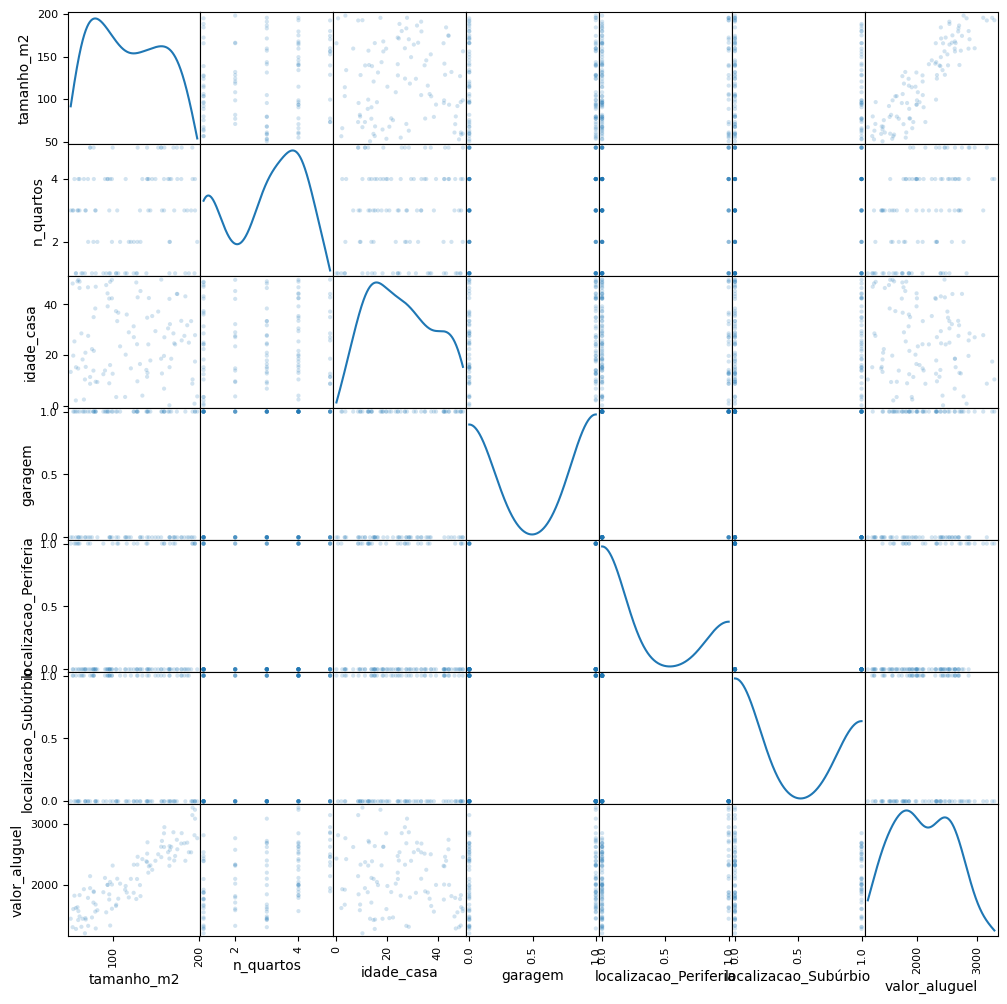

In [109]:
pd.plotting.scatter_matrix(df_rent, alpha=0.2, figsize=(12,12), diagonal='kde')

array([[<Axes: title={'center': 'tamanho_m2'}>,
        <Axes: title={'center': 'n_quartos'}>,
        <Axes: title={'center': 'idade_casa'}>,
        <Axes: title={'center': 'garagem'}>],
       [<Axes: title={'center': 'localizacao_Periferia'}>,
        <Axes: title={'center': 'localizacao_Subúrbio'}>,
        <Axes: title={'center': 'valor_aluguel'}>, <Axes: >]],
      dtype=object)

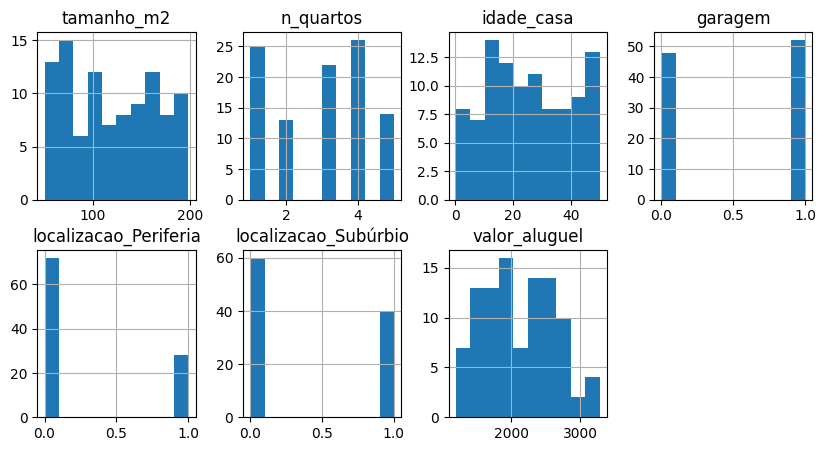

In [110]:
df_rent.hist(layout=(2,4), figsize=(10,5))

<Axes: >

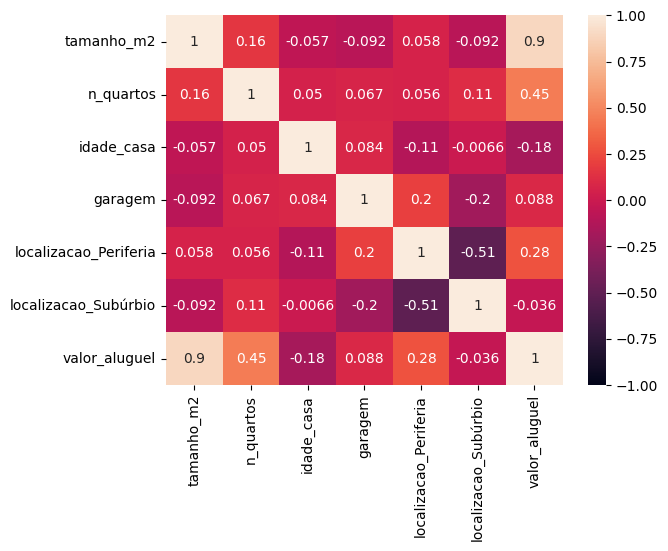

In [112]:
coef_corr = df_rent.corr(method="pearson")
sns.heatmap(coef_corr, vmin=-1, vmax=1, annot=True)

<Axes: >

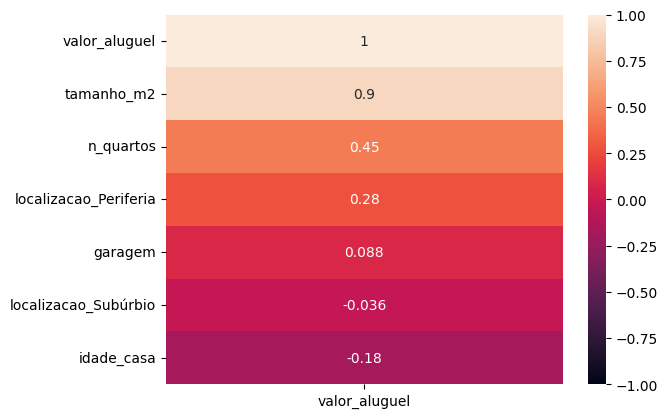

In [115]:
coef_corr_rent_value = coef_corr[['valor_aluguel']].sort_values(by='valor_aluguel', ascending=False)
sns.heatmap(coef_corr_rent_value, vmin=-1, vmax=1, annot=True)

<Axes: xlabel='valor_aluguel'>

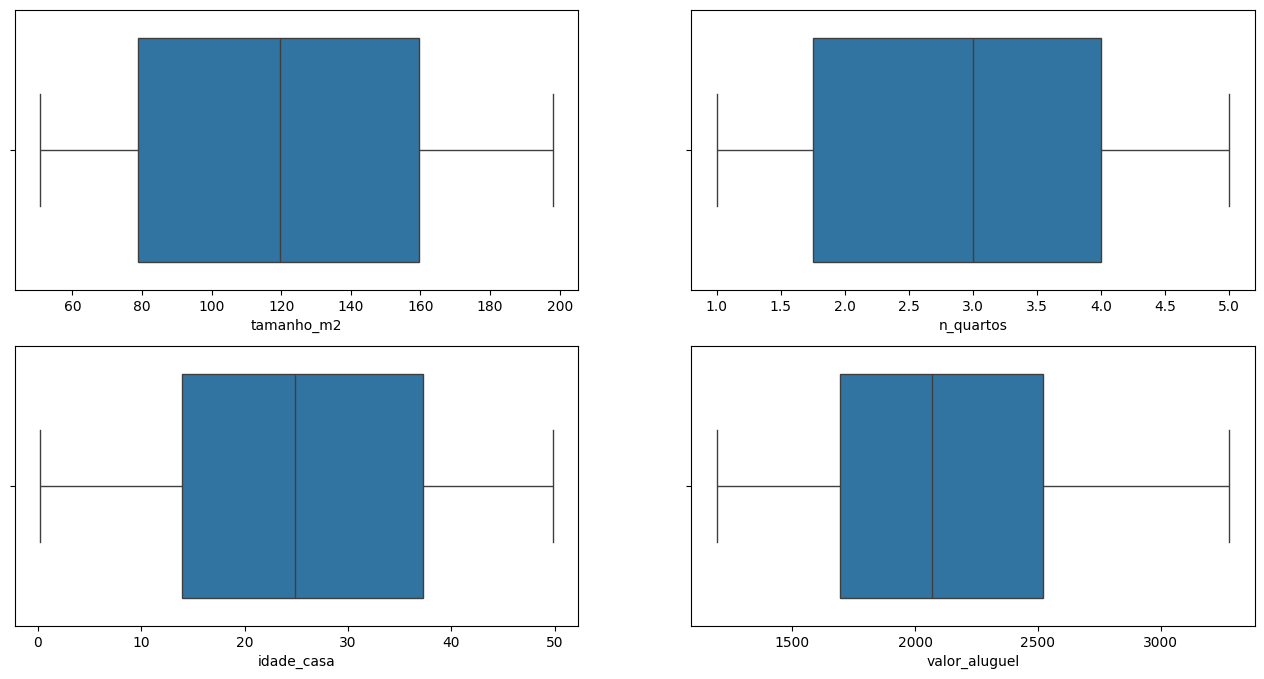

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
sns.boxplot(df_rent, x="tamanho_m2", ax=axes[0, 0])
sns.boxplot(df_rent, x="n_quartos", ax=axes[0, 1])
sns.boxplot(df_rent, x="idade_casa", ax=axes[1, 0])
sns.boxplot(df_rent, x="valor_aluguel", ax=axes[1, 1])

In [78]:
df_rent["localizacao_Subúrbio"].unique()

array([False,  True])

In [79]:
df_rent["localizacao_Periferia"].unique()

array([ True, False])

In [95]:
# df_rent = pd.get_dummies(df_rent, columns=["localizacao_Subúrbio", "localizacao_Periferia"], dtype="int64")
df_rent["localizacao_Periferia"] = df_rent["localizacao_Periferia"].astype(int)
df_rent["localizacao_Subúrbio"] = df_rent["localizacao_Subúrbio"].astype(int)

In [96]:
X = df_rent.drop(columns=["valor_aluguel"], axis=1)
y = df_rent["valor_aluguel"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [98]:
numeric_columns = ["tamanho_m2", "n_quartos", "idade_casa", "garagem"]
categoric_columns = ["localizacao_Periferia", "localizacao_Subúrbio"]

In [100]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

In [101]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_columns),
        ("categoric", categoric_transformer, categoric_columns)
    ]
)

In [102]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", LinearRegression())
    ]
)

In [103]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tamanho_m2', 'n_quartos',
                                                   'idade_casa', 'garagem']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['localizacao_Periferia',
                                                   'localizacao_Subúrbio'])])),
                ('regression', LinearRegression())])

In [104]:
y_pred = model.predict(X_test)

In [105]:
print(f"R2 = {r2_score(y_test, y_pred)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE = {math.sqrt(mean_squared_error(y_test, y_pred))}")

R2 = 0.9916999333653813
MAE = 40.155758399393285
RMSE = 50.45608982382549


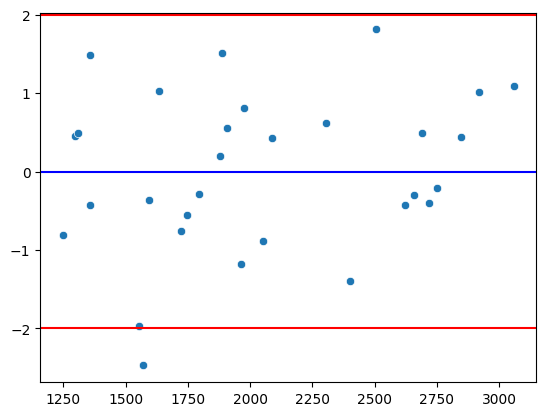

In [106]:
waste = y_test - y_pred
waste_std = zscore(waste)

sns.scatterplot(x=y_pred, y=waste_std)
plt.axhline(0, color="blue")
plt.axhline(-2, color="red")
plt.axhline(2, color="red")

* os resíduos estão entre [-2, +2] na escala padrão indicando linearidade
* os valores não estão em torno da reta indica heterocedasticidade

Text(0, 0.5, 'Resíduos na Escala Padrão')

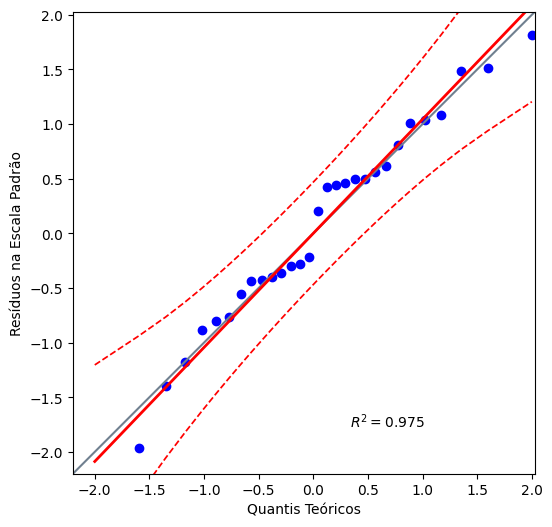

In [117]:
plt.figure(figsize=(12,6))
pg.qqplot(waste_std, dist="norm", confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("Resíduos na Escala Padrão")

In [122]:
stat_shapiro, p_value_shapiro = shapiro(waste_std)
print("Estatística do teste: {} e p-value: {}".format(stat_shapiro, p_value_shapiro))

Estatística do teste: 0.9747661268191621 e p-value: 0.6758377246738247


In [123]:
stat_ks, p_value_ks = kstest(waste_std, "norm")
print("Estatística do teste: {} e p-value: {}".format(stat_ks, p_value_ks))

Estatística do teste: 0.130614027811507 e p-value: 0.6382953474679425


In [124]:
stat_ll, p_value_ll = lilliefors(waste_std, dist="norm", pvalmethod="table")
print("Estatística do teste: {} e p-value: {}".format(stat_ll, p_value_ll))

Estatística do teste: 0.12801518362890485 e p-value: 0.23503826081753657


In [125]:
stat_and, critical_and, significance_and = anderson(waste, dist="norm")
print("Estatística do teste: {} e Valor Crítico: {}".format(stat_and, critical_and[2]))

Estatística do teste: 0.29625019290955024 e Valor Crítico: 0.712


In [126]:
pipe = Pipeline(steps=[("preprocessor", preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

test_gq = het_goldfeldquandt(waste, X_test_transformed)
stat_gq = test_gq[0]
p_value_gq = test_gq[1]
print("Estatística do teste: {} e p-value: {}".format(stat_gq, p_value_gq))

Estatística do teste: 0.3665975513472572 e p-value: 0.9113575737352358


In [132]:
intercept = model.named_steps["regression"].intercept_
coef = model.named_steps["regression"].coef_

print(model.feature_names_in_)
print(f"coef = {coef}")

['tamanho_m2' 'n_quartos' 'idade_casa' 'garagem' 'localizacao_Periferia'
 'localizacao_Subúrbio']
coef = [ 432.08158781  143.46077456  -67.36579253   71.206437   -145.26484126
  145.26484126  -85.24314746   85.24314746]


In [138]:
dict_sample = {
    "tamanho_m2": 360,
    "n_quartos": 3,
    "idade_casa": 30,
    "garagem": 1,
    "localizacao_Periferia": 0,
    "localizacao_Subúrbio": 1
}

df_sample = pd.DataFrame(dict_sample, index=[1])
df_sample

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio
1,360,3,30,1,0,1


In [139]:
model.predict(df_sample)

array([4671.2630468])